## Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# States represent how much money our gambler has, with range [0, 100] inclusive
V_s = np.zeros(101)
NUM_STATES, NUM_ACTIONS = 101, 50

# Reward of +1 at 100 and 0 otherwise
def reward(state):
  return int(state == 100)

# Gambler can bet at most up to his money, or the amount of money that gets him to 100 if heads
def get_actions(state):
  return list(range(0, min(state, 100 - state)))

def get_states():
  return list(range(1, 100))

# Probability of Heads
p_h = 0.4

# Calculate probability and new state, reward transitions
# There are 50 actions to take (actions in [1,50] inclusive)
# Returns list of (next_state, reward, probability)
def transitions(state, action):
  return [
    (state + action + 1, reward(state + action + 1), p_h),
    (state - action - 1, reward(state - action - 1), 1 - p_h),
  ]

# Set up training parameters
DELTA_LIM = 0.0000000001
DISCOUNT = 1

## Policy Evaluation
Estimates $V=v_\pi$

In [0]:
def policy_evaluation(V_s, policy):
  delta = DELTA_LIM + 1
  
  while delta > DELTA_LIM:
    delta = 0
    for state in get_states():
      old_state = V_s[state]
      
      expected_reward = 0
      for action in get_actions(state):
        action_reward = 0
        for next_state, reward, prob in transitions(state, action):
          action_reward += prob * (reward + DISCOUNT * V_s[next_state])
        expected_reward += action_reward * policy[state, action]

      V_s[state] = expected_reward
      delta = max(delta, abs(old_state - V_s[state]))
    
  return V_s

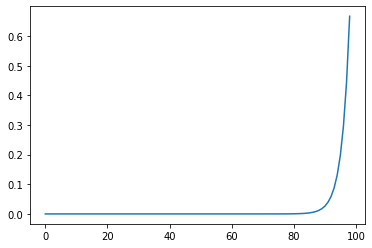

In [0]:
# Our policy is to bet 1 everytime
policy = np.zeros((NUM_STATES, NUM_ACTIONS))
policy[:, 0] = 1

V_s = policy_evaluation(V_s, policy)

plt.plot(V_s[1:-1])
plt.savefig('policy_eval.png')

## Policy Improvement

In [0]:
def policy_improvement(V_s, policy):
  stable = True

  for state in get_states():
    old_action = np.argmax(policy[state])
    rewards = np.zeros(NUM_ACTIONS)

    for action in get_actions(state):
      for next_state, reward, prob in transitions(state, action):
        rewards[action] += prob * (reward + DISCOUNT * V_s[next_state])

    policy[state] = np.eye(NUM_ACTIONS)[np.argmax(rewards)]  
    stable &= (old_action == np.argmax(policy[state]))
  
  return policy, stable

## Policy Iteration
Estimating $\pi \approx \pi_*$

In [0]:
def policy_iteration():
  V_s = np.random.random(NUM_STATES)
  V_s[-1] = 0

  policy = np.zeros((NUM_STATES, NUM_ACTIONS))
  policy[:, 0] = 1

  stable = False
  while not stable:
    V_s = policy_evaluation(V_s, policy)
    policy, stable = policy_improvement(V_s, policy)
  return V_s, policy

In [0]:
median = []
for _ in range(50):
  _, policy = policy_iteration()
  median.append(np.argmax(policy, axis=1))

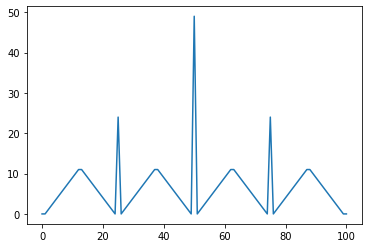

<Figure size 432x288 with 0 Axes>

In [0]:
med = np.median(np.array(median), axis=0)
plt.plot(np.arange(NUM_STATES), med)
plt.show()
plt.savefig('policy_med.png')

## Value Iteration

In [0]:
def value_iteration(V_s):
  delta = DELTA_LIM + 1
  policy = np.zeros((NUM_STATES, NUM_ACTIONS))
  policy[:, 0] = 1
  
  while delta > DELTA_LIM:
    delta = 0
    for state in get_states():
      v = V_s[state]
      rewards = np.zeros(NUM_ACTIONS)

      for action in get_actions(state):
        for next_state, reward, prob in transitions(state, action):
          rewards[action] += prob * (reward + DISCOUNT * V_s[next_state])
      
      V_s[state] = rewards.max()
      policy[state] = np.eye(NUM_ACTIONS)[np.argmax(rewards)]
      delta = max(delta, abs(v - V_s[state]))
    
  return policy, V_s

In [0]:
V_s = np.random.random(101)
V_s[-1] = 0
policy, V_s = value_iteration(V_s)

In [0]:
plt.bar(range(101), np.argmax(policy, axis=1))
plt.show()
plt.plot(V_s[1:-1])
plt.show()